**IMPORTING THE LIBRARIES**

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()

from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import accuracy_score

**IMPORTING THE DATASET**

In [25]:
hp_data=pd.read_csv("house_price.csv")

In [26]:
hp_data.shape

(1000, 7)

In [27]:
hp_data.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [28]:
hp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [29]:
hp_data.describe()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


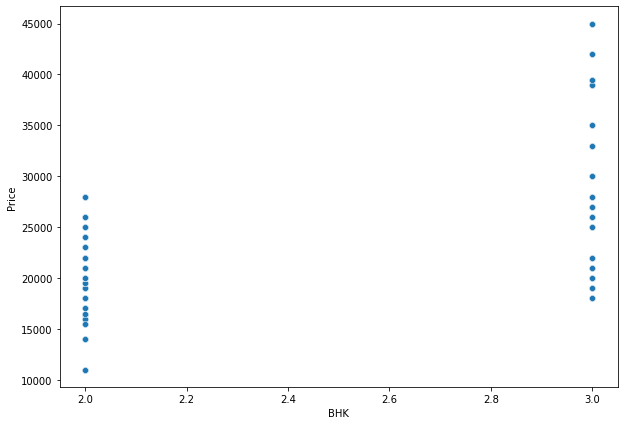

In [30]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="BHK",y="Price",data=hp_data)

**DETECTING THE OUTLIERS**

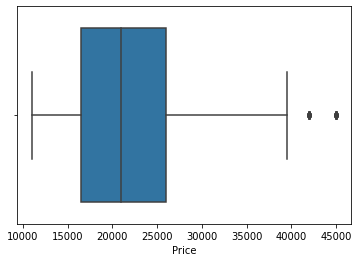

In [31]:
sns.boxplot(x=hp_data["Price"])

In [32]:
# Position of the Outlier in Price
a=np.where(hp_data['Price']>28000)
a[0]

array([  5,   6,   7,   9,  16,  19,  20,  25,  32,  37,  49,  53,  54,
        60,  64,  66,  75,  77,  88,  90,  96, 104, 114, 118, 121, 127,
       132, 137, 139, 153, 157, 163, 164, 167, 169, 174, 175, 186, 190,
       195, 210, 214, 220, 225, 234, 240, 242, 250, 252, 259, 269, 277,
       278, 283, 289, 297, 300, 310, 311, 317, 318, 323, 325, 327, 331,
       333, 339, 353, 358, 368, 372, 374, 386, 399, 403, 406, 416, 440,
       445, 452, 453, 459, 467, 480, 483, 499, 502, 503, 505, 507, 511,
       518, 519, 522, 523, 529, 531, 535, 536, 546, 551, 553, 563, 568,
       569, 582, 583, 584, 587, 598, 623, 624, 628, 631, 644, 645, 653,
       656, 657, 661, 663, 666, 672, 689, 693, 694, 698, 699, 701, 711,
       712, 731, 738, 742, 744, 747, 755, 764, 779, 781, 796, 799, 804,
       815, 818, 828, 829, 831, 833, 837, 839, 845, 872, 879, 882, 905,
       921, 937, 946, 949, 959, 961, 967, 986, 988, 999])

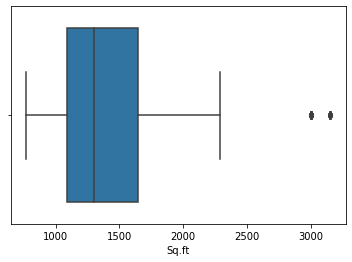

In [33]:
sns.boxplot(x=hp_data["Sq.ft"])

# Visualizing the correlations between numerical variables

In [34]:
hp_data.corr()['Price']

BHK           0.633094
Furnishing    0.018996
Sq.ft         0.831104
Old(years)   -0.304325
Floor         0.599192
Price         1.000000
Name: Price, dtype: float64

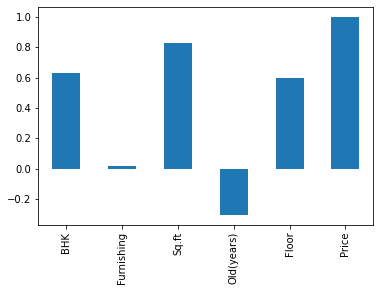

In [35]:
hp_data.corr()['Price'].plot(kind = 'bar')
plt.show()

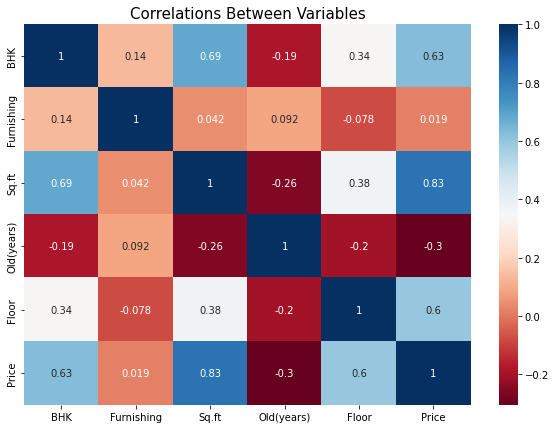

In [36]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(hp_data.corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

# Feature selection

We are selecting numerical features which have more than 0.50  correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function.

In [37]:
imp_num_cols = list(hp_data.corr()["Price"][(hp_data.corr()["Price"]>0.50) ].index)
print(imp_num_cols)

['BHK', 'Sq.ft', 'Floor', 'Price']


In [38]:
hp_data=hp_data[["Location","BHK","Floor","Price","Sq.ft"]]
hp_data


,Location,BHK,Floor,Price,Sq.ft
0,Bommanahalli,3,3,28000,3000
1,Bommanahalli,3,0,18000,1650
2,Whitefield,2,3,16400,1000
3,Whitefield,3,9,27000,1600
4,Whitefield,2,1,20000,1200
...,...,...,...,...,...
995,Bommanahalli,3,2,25000,1460
996,Whitefield,3,7,28000,2100
997,Bommanahalli,2,0,16500,1033
998,Bommanahalli,3,1,22000,1500


In [39]:
hp_data.isnull().sum()

Location    0
BHK         0
Floor       0
Price       0
Sq.ft       0
dtype: int64

In [40]:
hp_data=pd.get_dummies(hp_data)
hp_data

,BHK,Floor,Price,Sq.ft,Location_Bommanahalli,Location_Whitefield
0,3,3,28000,3000,1,0
1,3,0,18000,1650,1,0
2,2,3,16400,1000,0,1
3,3,9,27000,1600,0,1
4,2,1,20000,1200,0,1
...,...,...,...,...,...,...
995,3,2,25000,1460,1,0
996,3,7,28000,2100,0,1
997,2,0,16500,1033,1,0
998,3,1,22000,1500,1,0


# Spliting the data into independent and target variable

In [41]:
X=hp_data.drop("Price",axis=1)
Y=hp_data["Price"]


# Standardizing the Data:-
Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1.

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X)

array([[ 1.1373557 , -0.14336036,  3.15947496,  0.99203175, -0.99203175],
       [ 1.1373557 , -1.06826592,  0.41013441,  0.99203175, -0.99203175],
       [-0.87923242, -0.14336036, -0.91362216, -1.00803226,  1.00803226],
       ...,
       [-0.87923242, -1.06826592, -0.84641606,  0.99203175, -0.99203175],
       [ 1.1373557 , -0.75996407,  0.10465212,  0.99203175, -0.99203175],
       [ 1.1373557 ,  2.32305445,  0.65044714, -1.00803226,  1.00803226]])

# Model Selection

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=42)

# Logistic Regression and Checking the Accuracy

In [52]:
from sklearn import linear_model
lm=linear_model.LinearRegression()
lm.fit(X_train,Y_train)
test_pred = lm.predict(X_test)
train_pred=lm.predict(X_train)
lm_score = lm.score(X_test,Y_test)
print(lm_score*100,'%')


84.5134653825226 %


In [50]:
rfr=RandomForestRegressor(n_estimators=50)
rfr.fit(X_train, Y_train)

test_pred = rfr.predict(X_test)
train_pred=rfr.predict(X_train)
rfr_score = rfr.score(X_test,Y_test)
print(rfr_score*100,'%')

99.93892822470056 %


**MODEL COMPARISION**

In [51]:
Model_Comparison = pd.DataFrame({
    'Model' : ['Linear Regression','Random Forest Regression'],
    'Scores_test': [lm_score* 100 ,rfr_score* 100]
    })
Model_Comparison

,Model,Scores_test
0,Linear Regression,84.513465
1,Random Forest Regression,99.938928
